In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import nan as NA #允许numpy用NA代替nan作为别名
from pandas import DataFrame,Series
import seaborn as sns
from pyecharts import options as opts
from pyecharts.charts import Bar,Grid,Pie
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB #声明notebook类型

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #显示中文标签
plt.rcParams['axes.unicode_minus'] = False #显示负号
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_sale = pd.read_excel(r'./电商销售数据.xlsx')
df_sale.head()

,日期,订单号,区域,客户性别,客户年龄,商品品类,进货价格,实际售价,销售数,销售额,利润
0,2023-11-01,10021404488,华东-上海市-上海,女,22,床品件套,¥4150,7090,11,77990,32340
1,2023-11-01,10021344597,华北-山西省-忻州,女,59,厨房电器,¥14000,17220,6,103320,19320
2,2023-11-01,10021531018,东北-辽宁省-辽阳,女,24,床品件套,¥7100,5680,3,17040,-4260
3,2023-11-01,10021583928,东北-吉林省-松原,女,33,床品件套,¥11000,16170,2,32340,10340
4,2023-11-01,10021353159,西南-四川省-乐山,女,34,床品件套,¥8350,11180,10,111800,28300


In [3]:
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7284 entries, 0 to 7283
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      7284 non-null   datetime64[ns]
 1   订单号     7284 non-null   int64         
 2   区域      7284 non-null   object        
 3   客户性别    7284 non-null   object        
 4   客户年龄    7284 non-null   int64         
 5   商品品类    7284 non-null   object        
 6   进货价格    7284 non-null   object        
 7   实际售价    7284 non-null   int64         
 8   销售数     7284 non-null   int64         
 9   销售额     7284 non-null   int64         
 10  利润      7284 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 626.1+ KB


In [4]:
df_sale['订单号'] = df_sale['订单号'].astype('str')
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7284 entries, 0 to 7283
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      7284 non-null   datetime64[ns]
 1   订单号     7284 non-null   object        
 2   区域      7284 non-null   object        
 3   客户性别    7284 non-null   object        
 4   客户年龄    7284 non-null   int64         
 5   商品品类    7284 non-null   object        
 6   进货价格    7284 non-null   object        
 7   实际售价    7284 non-null   int64         
 8   销售数     7284 non-null   int64         
 9   销售额     7284 non-null   int64         
 10  利润      7284 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 626.1+ KB


In [5]:
df_sale['进货价格'] = df_sale['进货价格'].str.replace('¥','').astype('float')
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7284 entries, 0 to 7283
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      7284 non-null   datetime64[ns]
 1   订单号     7284 non-null   object        
 2   区域      7284 non-null   object        
 3   客户性别    7284 non-null   object        
 4   客户年龄    7284 non-null   int64         
 5   商品品类    7284 non-null   object        
 6   进货价格    7284 non-null   float64       
 7   实际售价    7284 non-null   int64         
 8   销售数     7284 non-null   int64         
 9   销售额     7284 non-null   int64         
 10  利润      7284 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 626.1+ KB


In [6]:
df_split=df_sale['区域'].str.split(pat='-',expand=True)#数据拆分

df_sale['区域']=df_split.iloc[:,0]
df_sale['省份']=df_split.iloc[:,1]
df_sale['城市']=df_split.iloc[:,2]
df_sale.head()

,日期,订单号,区域,客户性别,客户年龄,商品品类,进货价格,实际售价,销售数,销售额,利润,省份,城市
0,2023-11-01,10021404488,华东,女,22,床品件套,4150.0,7090,11,77990,32340,上海市,上海
1,2023-11-01,10021344597,华北,女,59,厨房电器,14000.0,17220,6,103320,19320,山西省,忻州
2,2023-11-01,10021531018,东北,女,24,床品件套,7100.0,5680,3,17040,-4260,辽宁省,辽阳
3,2023-11-01,10021583928,东北,女,33,床品件套,11000.0,16170,2,32340,10340,吉林省,松原
4,2023-11-01,10021353159,西南,女,34,床品件套,8350.0,11180,10,111800,28300,四川省,乐山


## 数据可视化



电商销售数据分析的可视化不仅能直观地展现数据，还能帮助发现隐藏的信息和规律，为电商平台的运营策略提供关键支持。同时，它也促进了团队内部的沟通和协作，助力企业在竞争激烈的市场环境中做出迅速而准确的应对，电商销售数据可视化对电商企业具有极高的参考价值。

通过可视化方式，能够直观地展示大量销售数据，如销售额、订单量等。这样的展示方式更易于理解和解读，使得用户可以快速掌握数据的核心含义。并且，能够揭示数据中隐藏的关联和趋势。如，通过散点图可以观察产品的价格与销量之间的关系；通过热力图可以展现不同时间和地区的销售热度。




电商销售数据分析中的一个重要内容是单量趋势分析。对于经管专业的学习者来说，掌握单量趋势分析技能对于深入理解电商业务具有重要意义。单量趋势分析是指通过收集、整理并分析电商平台的订单数据，来研究订单量的变化趋势和规律。这种分析能够帮助我们了解消费者的购买行为和市场需求，从而为电商平台的运营和决策提供支持。

在进行单量趋势分析时，可观察订单量在不同时间尺度上的变化情况。通过对比历史数据，可以发现季节性、周期性或趋势性的变化，进而预测未来一段时间内的订单量走势。同时，还可以结合其他相关数据进行分析，如销售额、转化率、客单价等指标，来揭示订单量与这些因素之间的关系。


In [7]:
import matplotlib.style as psl
#魔法命令，用于在笔记本内联显示matplotlib图表
%matplotlib inline 
#确保图表以SVG格式显示
%config InlineBackend.figure_format = 'svg' 
plt.rcParams["font.sans-serif"] = 'Microsoft YaHei' #解决中文乱码问题
plt.rcParams['axes.unicode_minus'] = False #解决负号无法显示
# 使用 ggplot 风格
psl.use('ggplot')

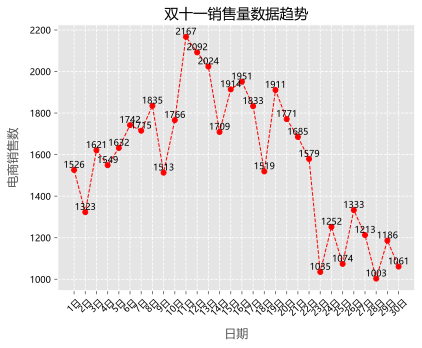

In [8]:
df_sale_line = df_sale.groupby('日期')['销售数'].sum().reset_index()
x = df_sale_line['日期'].astype('str').tolist()
y = df_sale_line['销售数'].tolist()

plt.plot(x,y,color='red',linestyle='--',linewidth=1,marker="o",markersize=5)

plt.xlabel("日期",labelpad = 10) #设置X轴距离，labelpad控制标题到图表的距离
plt.ylabel("电商销售数",labelpad = 10) #设置Y轴距离，labelpad控制标题到图表的距离
plt.title('双十一销售量数据趋势', loc = "center")

plt.xticks(x, ['{}日'.format(i+1) for i in range(30)],rotation=45,fontsize=9,color='k')#设置X坐标轴刻度
plt.yticks(fontsize=9,color='k')#设置Y坐标轴刻度
plt.grid(visible = True,linestyle='dashed')#设置网格线为虚线,axis='y'可只对Y轴打开网格线
#添加数值标签
for a,b in zip(x, y):
    plt.text(a,b,b, ha = "center", va = "bottom", fontsize = 9)

plt.savefig('1.png')
plt.show()

## 2.2销量分析


电商销售数据分析中的一个核心部分是销售分析。对于经管专业的学习者来说，深入理解和掌握销售分析的方法和技巧，对于评估电商业务绩效、指导运营策略以及推动业务增长具有至关重要的作用。销售分析涉及到对电商平台上的销售额、销售量等关键指标进行细致而系统的研究。

在进行销售分析时，经管专业的学生可以采用多种分析方法和工具，如对比分析，以全面评估销售业绩。通过对比分析，可以评估不同产品的销售差异和变化。电商销售数据分析中的销售分析是经管专业学习者不可或缺的核心技能。通过掌握销售分析的方法和技巧，深入剖析销售数据，经管专业的学生能够为电商企业提供有价值的决策支持，助力企业在竞争激烈的市场环境中实现业务的持续繁荣和发展。


In [9]:
#随机生成颜色函数
def get_colors(categories):
    cmap = plt.get_cmap(lut = len(categories))
    colors = cmap(np.arange(len(categories)))
    return colors

In [10]:
df_sale_barhs = df_sale.groupby('商品品类')['销售数'].sum()
df_sale_barhs.index.tolist()

['办公家具', '卧室家具', '厨房电器', '家装饰品', '床品件套', '汽车配件', '浴室用品', '电脑硬件']

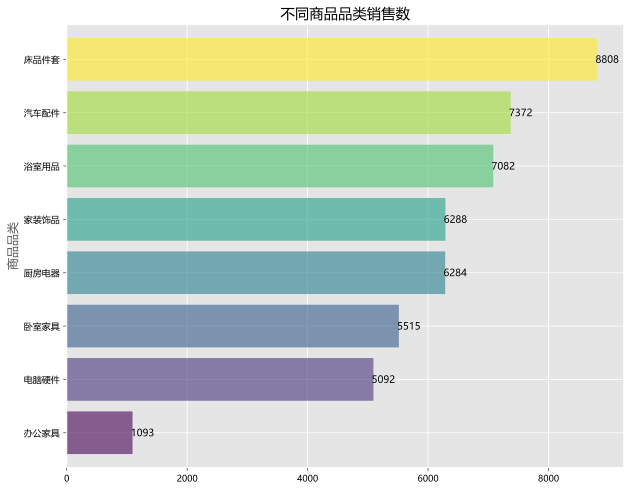

In [11]:
df_sale_barhs = df_sale.groupby('商品品类')['销售数'].sum().sort_values()

fig = plt.figure(figsize = (10,8))
# 创建一个新的图形，设置图形的大小为宽 10 单位、高 8 单位
ax  = plt.gca()
df_sale_barhs.plot(kind = 'barh',width = 0.8, alpha = 0.6,color=get_colors(df_sale_barhs.index.tolist()))
plt.title("不同商品品类销售数", loc="center")
plt.xticks(fontsize=9,color='k')#设置X坐标轴刻度
plt.yticks(fontsize=9,color='k')#设置Y坐标轴刻度
for p in ax.patches:
    width = p.get_width() 
    ax.annotate(
        '{}'.format(width),#标注内容为条高度
        xy = (width,p.get_y()+p.get_height()/2),
        xytext = (10,-6),
        textcoords = 'offset points',
        fontsize = 10,
        ha = 'center',
        va = 'bottom'
    )

plt.show()

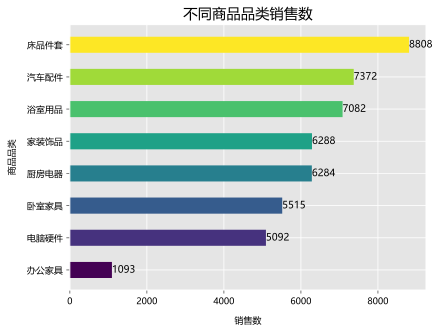

In [12]:
#魔法命令，用于在笔记本内联显示matplotlib图表
%matplotlib inline 
#确保图表以SVG格式显示
%config InlineBackend.figure_format = 'svg' 
plt.rcParams["font.sans-serif"] = 'Microsoft YaHei' #解决中文乱码问题
plt.rcParams['axes.unicode_minus'] = False #解决负号无法显示
psl.use('ggplot')

df_sale_barh = df_sale.groupby('商品品类')['销售数'].sum().reset_index().sort_values(by = '销售数')

x = df_sale_barh['商品品类'].tolist()
y = df_sale_barh['销售数'].tolist()

#绘制柱状图
plt.barh(x, width = y, height = 0.5, align = "center", label = "销售数",color=get_colors(x))

#设置标题
plt.title("不同商品品类销售数", loc="center")
plt.xticks(fontsize=9,color='k')#设置X坐标轴刻度
plt.yticks(fontsize=9,color='k')#设置Y坐标轴刻度

#添加数据标签
for a,b in zip(x, y):
    plt.text(b,a,b,ha = "left", va = "center", fontsize = 10)

plt.xlabel("销售数",labelpad=10,fontsize=9,color='k')#设置X轴距离，labelpad控制标题到图表的距离
plt.ylabel("商品品类",labelpad=10,fontsize=9,color='k')#设置x和y轴的名称

plt.show()

## 2.3利润分析


电商销售数据分析中的利润分析是经管专业学习者必须掌握的关键内容之一。对于电商企业而言，利润是衡量经营绩效和财务健康状况的重要指标。因此，经管专业的学生需要深入了解和应用于电商环境中的利润分析方法。利润分析涉及到对电商平台的收入、成本、费用等方面进行综合考量。通过对利润数据的细致分析，可以揭示出电商平台的盈利能力、成本控制效果以及经营效率等方面的情况。

在进行利润分析时，经管专业的学生需要结合电商平台的特点和运营模式，对利润数据进行多维度的剖析。可以分析不同区域的利润，找出高利润和低利润的区域，并进一步研究其原因，从而为各区域定制不同的策略来调整利润情况。通过深入研究和理解利润数据，学生能够为电商企业提供有关盈利能力评估和经营决策的建议。这将有助于企业在激烈的市场竞争中保持稳健的财务状况，实现可持续发展和长期盈利。


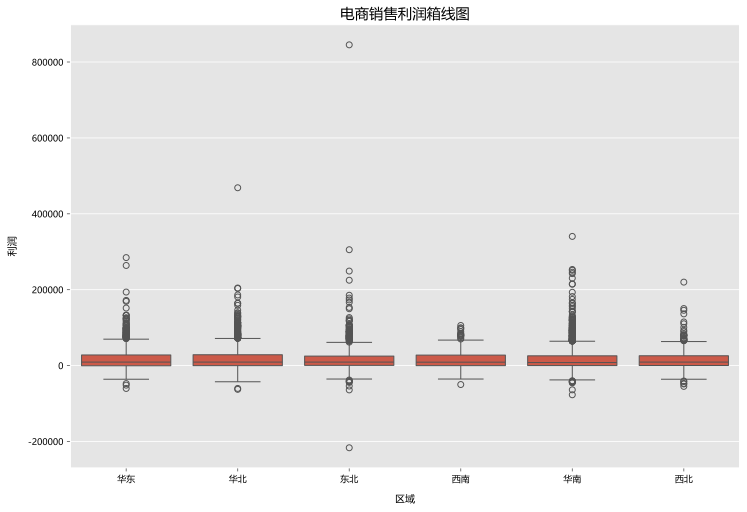

In [13]:

plt.figure(figsize = (12, 8)) #设置图表画布大小
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

psl.use('ggplot')
plt.title('电商销售利润箱线图')

sns.boxplot(x=df_sale['区域'],y=df_sale['利润'],data=df_sale)
plt.xticks(fontsize=9,color='k')#设置X坐标轴刻度
plt.yticks(fontsize=9,color='k')#设置Y坐标轴刻度

plt.xlabel("区域",labelpad=10,fontsize=10,color='k')#设置X轴距离，labelpad控制标题到图表的距离
plt.ylabel("利润",labelpad=10,fontsize=10,color='k')#设置x和y轴的名称
#plt.ylim(-100000,200000) # 如果不限制，就不容易看清箱型，所以把轴缩小
plt.show()


## 2.4成本分析


电商销售数据分析中也涉及到成本分析，这对于经管专业的学习者来说，是理解电商业务运营全貌的重要一环。在电商运营中，成本是一个不可忽视的因素。对于电商平台来说，成本涉及到商品进货价格与实际售价的关系。成本分析的核心在于对电商平台的各项成本进行详细的核算和分析。

通过成本分析，经管专业的学生可以深入了解电商平台的成本结构。在实际操作中，经管专业的学生应充分利用电商平台提供的数据工具和报表，提取和分析相关成本数据。通过成本分析，才能够更全面地评估电商平台的运营状况，为优化成本结构、提高经营效率、增强竞争力提供有力支持，推动企业的可持续发展。


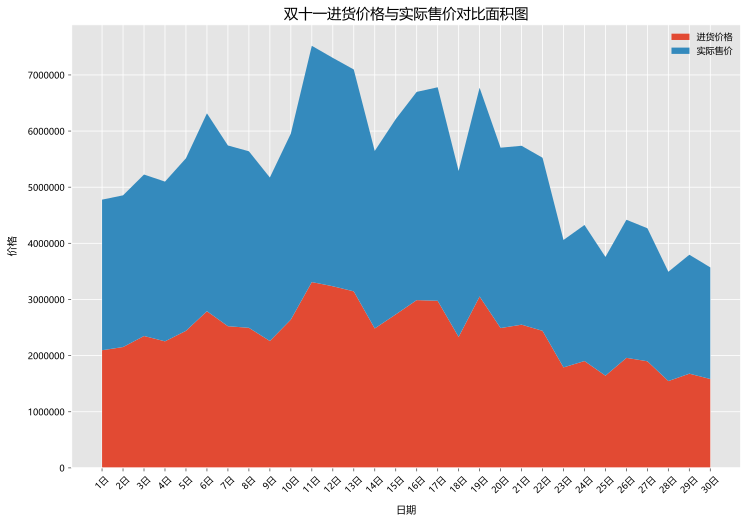

In [14]:
#魔法命令，用于在笔记本内联显示matplotlib图表
%matplotlib inline 
#确保图表以SVG格式显示
%config InlineBackend.figure_format = 'svg' 
plt.rcParams["font.sans-serif"] = 'Microsoft YaHei' #解决中文乱码问题
plt.rcParams['axes.unicode_minus'] = False #解决负号无法显示
psl.use('ggplot')
plt.figure(figsize = (12, 8)) #设置图表画布大小
df_sale_stack=df_sale.groupby('日期')[['进货价格','实际售价']].sum().reset_index()

x=df_sale_stack['日期'].astype('str').tolist()
y1=df_sale_stack['进货价格'].tolist()
y2=df_sale_stack['实际售价'].tolist()

#绘制面积图
plt.stackplot(x, y1, y2, labels = ["进货价格","实际售价"] )

#设置标题
plt.title("双十一进货价格与实际售价对比面积图",loc ="center")

#设置x和y轴的名称
plt.xlabel("日期")
plt.ylabel("价格")
# 让 y 轴刻度不显示科学记数法
plt.ticklabel_format(axis='y', style='plain')
#设置X坐标轴刻度
plt.xticks(x, ['{}日'.format(i+1) for i in range(30)],rotation=45,fontsize=9,color='k')#设置X坐标轴刻度
plt.yticks(fontsize=9,color='k')#设置Y坐标轴刻度
plt.legend(loc = "upper right",frameon=False,fontsize=9)

plt.xlabel("日期",labelpad=10,fontsize=10,color='k')#设置X轴距离，labelpad控制标题到图表的距离
plt.ylabel("价格",labelpad=10,fontsize=10,color='k')#设置x和y轴的名称

#图像展示
plt.show()

## 2.5销售额分析


电商销售数据分析中的销售额分析是经管专业学习者的核心关注点之一。对于电商平台来说，销售额是衡量业绩和成长性的关键指标，因此，对销售额进行深入分析具有至关重要的意义。对于经管专业的学生而言，掌握销售额分析的方法与技巧，能够帮助他们更好地了解电商平台的销售表现。

通过销售额的趋势分析，经管专业的学生可以观察销售额与销售数的关系，为电商平台制定销售计划和策略提供依据。通过销售额分析，经管专业的学习者能够更准确地把握电商平台的销售情况和市场动态，为企业的市场定位、目标设定和策略制定提供重要依据。这将有助于他们在电商领域中展现出色的分析和决策能力，推动业务的增长和成功。


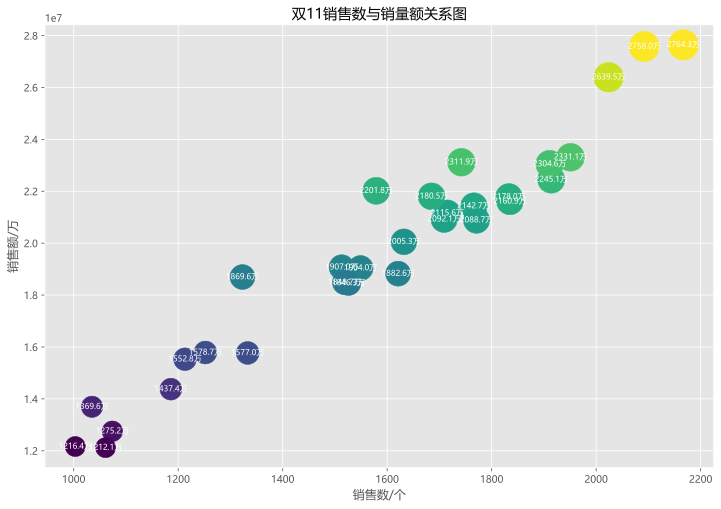

In [15]:
#魔法命令，用于在笔记本内联显示matplotlib图表
%matplotlib inline 
#确保图表以SVG格式显示
%config InlineBackend.figure_format = 'svg' 

plt.rcParams["font.sans-serif"] = 'Microsoft YaHei' #解决中文乱码问题
plt.rcParams['axes.unicode_minus'] = False #解决负号无法显示

psl.use('ggplot')
plt.figure(figsize=(12, 8)) #设置图表画布大小
df_sale_scatter=df_sale.groupby('日期')[['销售数','销售额']].sum().reset_index()
#设置数据系列
x=df_sale_scatter['销售数']
y=df_sale_scatter['销售额']

#绘制气泡图
plt.scatter(x,y,marker="o",c=y*100,s =y/30000)

#设置标题
plt.title("双11销售数与销量额关系图",loc="center")

#添加数据标签
for a,b in zip(x,y):
    plt.text(a,b,f'{b/10000:.1f}万',ha="center",va="center",fontsize=8,color="white")

#设置x和y轴名称
plt.xlabel("销售数/个")
plt.ylabel("销售额/万")

#图像展示
plt.show()

## 2.6品类分析


电商销售数据分析中的品类分析是一个重要且富有价值的分析维度。在电商平台上，商品品类繁多，每个品类的销售表现和市场需求都各不相同。因此，通过品类分析，经管专业的学生能够深入了解各个品类的销售情况，为电商平台的商品管理、市场策略和资源配置提供重要决策依据。

通过对比分析，比较不同品类之间的销售表现，找出优势品类和潜力品类。电商销售数据分析中的品类分析为经管专业的学习者提供了深入了解商品销售情况和市场需求的途径。掌握品类分析的方法和技巧，将有助于他们在电商领域展现出色的分析能力，为企业的发展贡献智慧和决策支持。


In [16]:
df_sale['日']=df_sale['日期'].dt.strftime('%d日')
df_sale['日']

0       01日
1       01日
2       01日
3       01日
4       01日
       ... 
7279    30日
7280    30日
7281    30日
7282    30日
7283    30日
Name: 日, Length: 7284, dtype: object

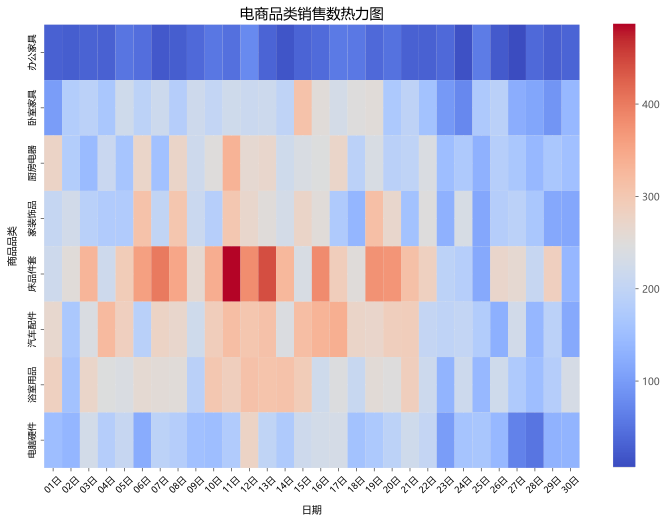

In [25]:
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.style.use('ggplot')

plt.figure(figsize=(12, 8))
plt.title('电商品类销售数热力图')
'''
pivot_table 是 pandas 库中 DataFrame 的一个方法，用于创建数据透视表。
    index='商品品类'：指定数据透视表的行索引，将 商品品类 列中的不同元素作为行索引。
    columns='日'：指定数据透视表的列索引，将 日 列中的不同元素作为列索引。
    values='销售数'：指定要汇总的数据列，这里是 销售数 列。
    aggfunc='sum'：指定聚合函数，这里使用 sum 函数，将 销售数 列中相同 商品品类 和 日 的元素进行求和汇总。

'''
grouped_df = df_sale.pivot_table(index='商品品类', columns='日', values='销售数', aggfunc='sum')  
sns.heatmap(data=grouped_df, cmap='coolwarm') #常见的颜色映射有"viridis"、"coolwarm"、"RdBu"等 
#设置X坐标轴刻度
plt.xticks(rotation=45,fontsize=9,color='k')#设置X坐标轴刻度
plt.yticks(fontsize=9,color='k')#设置Y坐标轴刻度

plt.xlabel("日期",labelpad=10,fontsize=10,color='k')#设置X轴距离，labelpad控制标题到图表的距离
plt.ylabel("商品品类",labelpad=10,fontsize=10,color='k')#设置x和y轴的名称

plt.show()

## 3.销售分析仪表盘
销售仪表盘是一个交互式的工具，用于展示销售数据的关键指标和趋势，可以将复杂的销售数据以直观、易懂的方式展现出来，帮助销售团队更好地了解销售情况、跟踪目标、诊断问题并做出数据驱动的决策。通过仪表盘，销售团队可以直观地看到销售额、订单量、客户数量等关键指标，从而快速了解销售情况，并且，仪表盘展示了销售数据的变化趋势，帮助团队发现销售增长或下降的原因，并及时采取措施，除此之外，仪表盘提供的数据可视化有助于团队更深入地了解销售情况，从而基于数据做出更明智的决策。

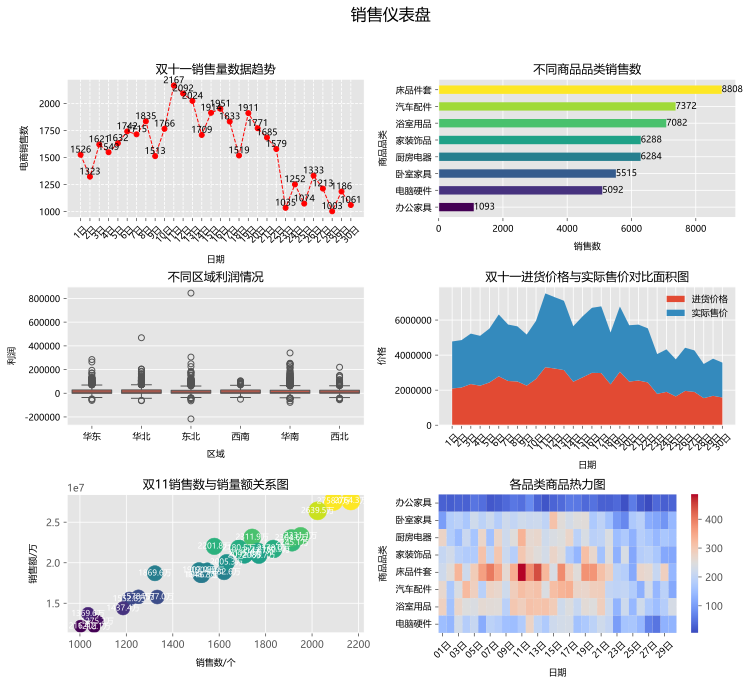

In [31]:
#魔法命令，用于在笔记本内联显示matplotlib图表
%matplotlib inline 
#确保图表以SVG格式显示
%config InlineBackend.figure_format = 'svg' 

plt.rcParams["font.sans-serif"] = 'Microsoft YaHei' #解决中文乱码问题
plt.rcParams['axes.unicode_minus'] = False #解决负号无法显示

psl.use('ggplot')
plt.figure(figsize = (12, 10)) #设置图表画布大小

#折线图
plt.subplot(3,2,1)
df_sale_line=df_sale.groupby('日期')['销售数'].sum().reset_index()

x=df_sale_line['日期'].astype('str').tolist()
y=df_sale_line['销售数'].tolist()

plt.plot(x,y,color="red",linestyle= "--",linewidth=1,marker="o",markersize=5)

plt.xlabel("日期",labelpad=10,fontsize=9,color='k') #设置X轴距离，labelpad控制标题到图表的距离
plt.ylabel("电商销售数",labelpad=10,fontsize=9,color='k') #设置Y轴距离，labelpad控制标题到图表的距离

plt.title('双十一销售量数据趋势',loc = "center",fontsize=12,color='k')

plt.xticks(x, ['{}日'.format(i+1) for i in range(30)],rotation=45,fontsize=9,color='k')#设置X坐标轴刻度
plt.yticks(fontsize=9,color='k')#设置Y坐标轴刻度

plt.grid(visible = True,linestyle='dashed')#设置网格线为虚线,axis='y'可只对Y轴打开网格线

for a,b in zip(x, y):
    plt.text(a,b,b,ha="center",va = "bottom",fontsize=9,color='k')

#条形图
plt.subplot(3,2,2)
df_sale_barh=df_sale.groupby('商品品类')['销售数'].sum().reset_index().sort_values(by='销售数')

x=df_sale_barh['商品品类'].tolist()
y=df_sale_barh['销售数'].tolist()

#绘制柱状图
plt.barh(x, width = y, height = 0.5, align = "center", label = "销售数",color=get_colors(x))

#设置标题
plt.title("不同商品品类销售数",loc="center",fontsize=12,color='k')

plt.xticks(fontsize=9,color='k')#设置X坐标轴刻度
plt.yticks(fontsize=9,color='k')#设置Y坐标轴刻度

#添加数据标签
for a,b in zip(x, y):
    plt.text(b,a,b,ha="left",va="center",fontsize=9,color='k')

plt.xlabel("销售数",labelpad=8,fontsize=9,color='k')#设置X轴距离，labelpad控制标题到图表的距离
plt.ylabel("商品品类",labelpad=8,fontsize=9,color='k')#设置x和y轴的名称

#箱线图
plt.subplot(3,2,3)
x=df_sale['利润']#指定绘制箱线图的数据

sns.boxplot(x=df_sale['区域'],y=df_sale['利润'],data=df_sale)

plt.xticks(fontsize=9,color='k')#设置X坐标轴刻度
plt.yticks(fontsize=9,color='k')#设置Y坐标轴刻度

plt.title("不同区域利润情况", loc="center",fontsize=12,color='k')#设置标题

plt.xlabel("区域",labelpad=8,fontsize=9,color='k')#设置X轴距离，labelpad控制标题到图表的距离
plt.ylabel("利润",labelpad=8,fontsize=9,color='k')#设置x和y轴的名称

#面积图
plt.subplot(3,2,4)
plt.ticklabel_format(axis='y', style='plain')
df_sale_stack=df_sale.groupby('日期')[['进货价格','实际售价']].sum().reset_index()

x=df_sale_stack['日期'].astype('str').tolist()
y1=df_sale_stack['进货价格'].tolist()
y2=df_sale_stack['实际售价'].tolist()

#绘制面积图
plt.stackplot(x, y1, y2, labels = ["进货价格","实际售价"] )

#设置标题
plt.title("双十一进货价格与实际售价对比面积图",loc ="center",fontsize=12,color='k')

#设置x和y轴的名称
plt.xlabel("日期")
plt.ylabel("价格")

#设置X坐标轴刻度
plt.xticks(x, ['{}日'.format(i+1) for i in range(30)],rotation=45,fontsize=9,color='k')#设置X坐标轴刻度
plt.yticks(fontsize=9,color='k')#设置Y坐标轴刻度

#设置图例
plt.legend(loc = "upper right",frameon=False,fontsize=9)

plt.xlabel("日期",labelpad=8,fontsize=9,color='k')#设置X轴距离，labelpad控制标题到图表的距离
plt.ylabel("价格",labelpad=8,fontsize=9,color='k')#设置x和y轴的名称

#气泡图
plt.subplot(3,2,5)
#导入数据
df_sale_scatter=df_sale.groupby('日期')[['销售数','销售额']].sum().reset_index()

#设置数据系列
x=df_sale_scatter['销售数']
y=df_sale_scatter['销售额']

#绘制气泡图
plt.scatter(x,y,marker="o",c=y*100,s =y/80000)

#设置标题
plt.title("双11销售数与销量额关系图",loc="center",fontsize=12,color='k')

#添加数据标签
for a,b in zip(x,y):
    plt.text(a,b,f'{b/10000:.1f}万',ha="center",va="center",fontsize=8,color="white")

#设置x和y轴名称
plt.xlabel("销售数/个",labelpad=8,fontsize=9,color='k')
plt.ylabel("销售额/万",labelpad=8,fontsize=9,color='k')

# 热力图  
plt.subplot(3,2,6)
grouped_df = df_sale.pivot_table(index='商品品类', columns='日', values='销售数', aggfunc='sum')  
sns.heatmap(data=grouped_df, cmap='coolwarm') #常见的颜色映射有"viridis"、"coolwarm"、"RdBu"等 

#设置X坐标轴刻度
plt.xticks(rotation=45,fontsize=9,color='k')#设置X坐标轴刻度
plt.yticks(fontsize=9,color='k')#设置Y坐标轴刻度

plt.title("各品类商品热力图", loc="center",fontsize=12,color='k')#设置标题

plt.xlabel("日期",labelpad=8,fontsize=9,color='k')#设置X轴距离，labelpad控制标题到图表的距离
plt.ylabel("商品品类",labelpad=8,fontsize=9,color='k')#设置x和y轴的名称

plt.suptitle("销售仪表盘",fontsize=16,color='k')
plt.subplots_adjust(wspace=0.25,hspace=0.5) #wspace：子图之间的宽度间隔，hspace：子图之间的高度间隔。
plt.savefig('my_figure2.jpg')
plt.show()
